# Gradient Fields: A Visual Introduction

This notebook provides an interactive exploration of **gradient fields** - one of the most important concepts in multivariable calculus and physics.

## What We'll Cover
1. Scalar fields and their visualization
2. The gradient: from intuition to definition
3. Visualizing gradient fields
4. Key properties of gradient fields
5. Physical applications

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Set default figure size and style
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 100

## 1. Scalar Fields

A **scalar field** assigns a single number to each point in space. Examples include:
- Temperature at each point in a room
- Elevation on a topographic map
- Pressure in a fluid
- Electric potential around charges

Mathematically, a 2D scalar field is a function $f: \mathbb{R}^2 \to \mathbb{R}$, written as $f(x, y)$.

Let's visualize a simple scalar field: $f(x, y) = x^2 + y^2$ (a paraboloid).

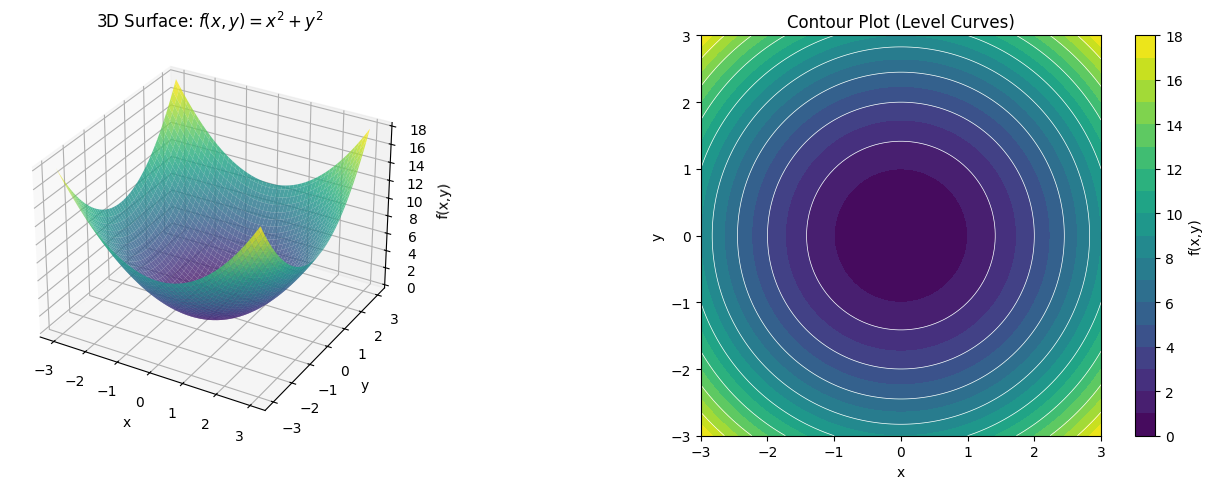

In [2]:
# Create a grid of points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Define our scalar field: f(x,y) = x^2 + y^2
Z = X**2 + Y**2

fig = plt.figure(figsize=(14, 5))

# 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('3D Surface: $f(x,y) = x^2 + y^2$')

# Contour plot (level curves)
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, levels=20, cmap=cm.viridis)
ax2.contour(X, Y, Z, levels=10, colors='white', linewidths=0.5)
plt.colorbar(contour, ax=ax2, label='f(x,y)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Plot (Level Curves)')
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

## 2. The Gradient: Intuition

Imagine you're hiking on a mountain (represented by the surface above). At any point, you might ask:

> **"Which direction leads uphill most steeply, and how steep is it?"**

The **gradient** answers both questions:
- **Direction**: Points in the direction of steepest ascent
- **Magnitude**: Tells you how steep that ascent is

### Definition

For a function $f(x, y)$, the gradient is the vector of partial derivatives:

$$\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)$$

The symbol $\nabla$ ("nabla" or "del") represents the gradient operator.

### Example: Computing the Gradient

For $f(x, y) = x^2 + y^2$:

$$\frac{\partial f}{\partial x} = 2x, \quad \frac{\partial f}{\partial y} = 2y$$

Therefore:
$$\nabla f = (2x, 2y)$$

At point $(1, 1)$: $\nabla f = (2, 2)$ - points away from origin (uphill on the paraboloid).

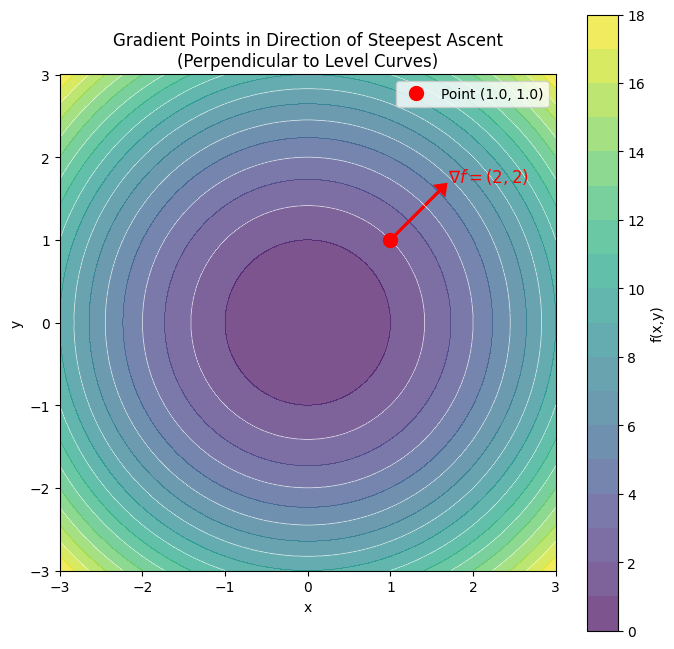

At point (1.0, 1.0):
  Gradient = (2.0, 2.0)
  Magnitude = 2.83 (steepness)


In [3]:
# Visualize gradient at a single point
fig, ax = plt.subplots(figsize=(8, 8))

# Contour plot
contour = ax.contourf(X, Y, Z, levels=20, cmap=cm.viridis, alpha=0.7)
ax.contour(X, Y, Z, levels=10, colors='white', linewidths=0.5)
plt.colorbar(contour, ax=ax, label='f(x,y)')

# Point of interest
px, py = 1.0, 1.0
grad_x, grad_y = 2*px, 2*py  # Gradient at (px, py)

# Plot the point and gradient vector
ax.plot(px, py, 'ro', markersize=10, label=f'Point ({px}, {py})')
ax.arrow(px, py, grad_x*0.3, grad_y*0.3, head_width=0.15, head_length=0.1, 
         fc='red', ec='red', linewidth=2)
ax.text(px + grad_x*0.35, py + grad_y*0.35, f'$\\nabla f = ({grad_x:.0f}, {grad_y:.0f})$', 
        fontsize=12, color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gradient Points in Direction of Steepest Ascent\n(Perpendicular to Level Curves)')
ax.set_aspect('equal')
ax.legend()
plt.show()

print(f"At point ({px}, {py}):")
print(f"  Gradient = ({grad_x}, {grad_y})")
print(f"  Magnitude = {np.sqrt(grad_x**2 + grad_y**2):.2f} (steepness)")

## 3. Gradient Fields (Vector Fields from Scalar Fields)

A **gradient field** is a vector field where each vector is the gradient of some scalar function.

Key insight: Every scalar field $f$ generates a gradient field $\nabla f$.

Let's visualize the complete gradient field for our paraboloid:

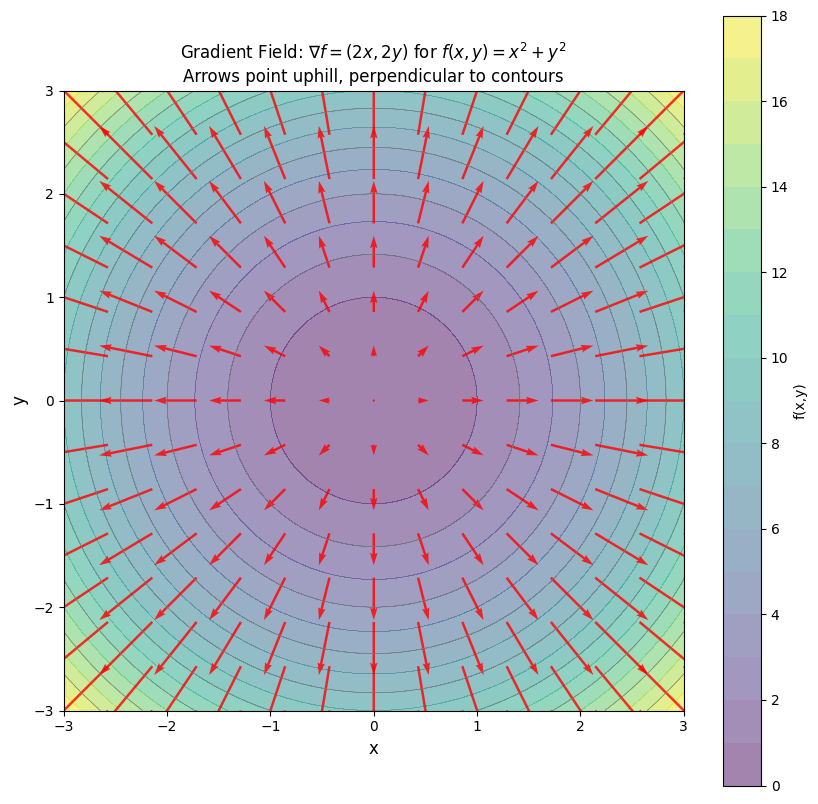

In [4]:
# Create a coarser grid for vector field visualization
x_vec = np.linspace(-3, 3, 15)
y_vec = np.linspace(-3, 3, 15)
X_vec, Y_vec = np.meshgrid(x_vec, y_vec)

# Compute gradient components
U = 2 * X_vec  # df/dx
V = 2 * Y_vec  # df/dy

fig, ax = plt.subplots(figsize=(10, 10))

# Contour background
contour = ax.contourf(X, Y, Z, levels=20, cmap=cm.viridis, alpha=0.5)
ax.contour(X, Y, Z, levels=10, colors='gray', linewidths=0.5)
plt.colorbar(contour, ax=ax, label='f(x,y)')

# Quiver plot of gradient field
ax.quiver(X_vec, Y_vec, U, V, color='red', alpha=0.8, scale=50)

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Gradient Field: $\\nabla f = (2x, 2y)$ for $f(x,y) = x^2 + y^2$\n'
             'Arrows point uphill, perpendicular to contours', fontsize=12)
ax.set_aspect('equal')
plt.show()

### Key Observation

Notice that the gradient vectors are **always perpendicular to the level curves** (contour lines).

This is because:
- Level curves are where $f$ is constant
- The gradient points where $f$ increases fastest
- Moving along a level curve = no change in $f$ = perpendicular to gradient

## 4. More Gradient Field Examples

Let's explore gradient fields for different scalar functions.

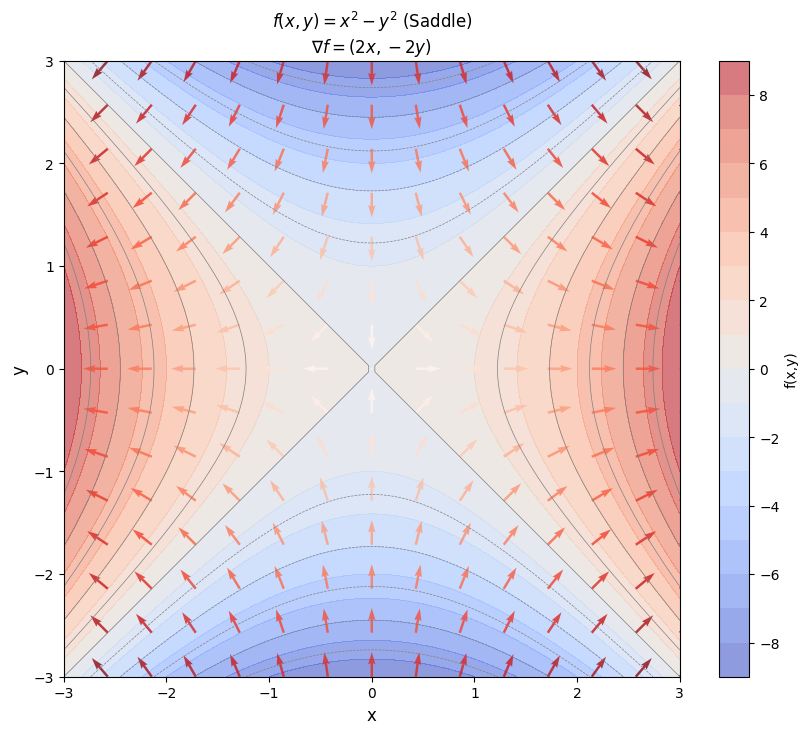

In [5]:
def plot_gradient_field(f, grad_f, title, xlim=(-3, 3), ylim=(-3, 3)):
    """
    Plot a scalar field and its gradient.
    
    Parameters:
    - f: scalar field function f(X, Y)
    - grad_f: gradient function returning (U, V) components
    - title: plot title
    """
    # Fine grid for contours
    x = np.linspace(*xlim, 100)
    y = np.linspace(*ylim, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    # Coarse grid for vectors
    x_v = np.linspace(*xlim, 15)
    y_v = np.linspace(*ylim, 15)
    Xv, Yv = np.meshgrid(x_v, y_v)
    U, V = grad_f(Xv, Yv)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Contours
    contour = ax.contourf(X, Y, Z, levels=20, cmap=cm.coolwarm, alpha=0.6)
    ax.contour(X, Y, Z, levels=15, colors='gray', linewidths=0.5)
    plt.colorbar(contour, ax=ax, label='f(x,y)')
    
    # Gradient vectors
    # Normalize for better visualization
    magnitude = np.sqrt(U**2 + V**2)
    magnitude[magnitude == 0] = 1  # Avoid division by zero
    ax.quiver(Xv, Yv, U/magnitude, V/magnitude, magnitude, 
              cmap='Reds', alpha=0.8, scale=25)
    
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title(title, fontsize=12)
    ax.set_aspect('equal')
    
    return fig, ax

# Example 1: Saddle surface
f1 = lambda X, Y: X**2 - Y**2
grad1 = lambda X, Y: (2*X, -2*Y)
plot_gradient_field(f1, grad1, 
    '$f(x,y) = x^2 - y^2$ (Saddle)\n$\\nabla f = (2x, -2y)$')
plt.show()

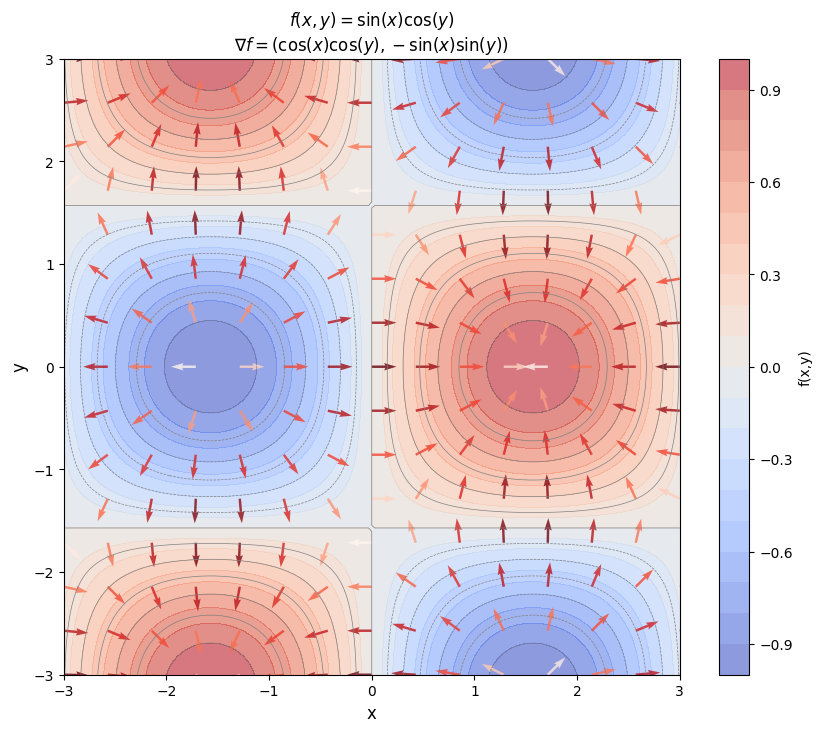

In [6]:
# Example 2: Sinusoidal surface
f2 = lambda X, Y: np.sin(X) * np.cos(Y)
grad2 = lambda X, Y: (np.cos(X) * np.cos(Y), -np.sin(X) * np.sin(Y))
plot_gradient_field(f2, grad2,
    '$f(x,y) = \\sin(x)\\cos(y)$\n$\\nabla f = (\\cos(x)\\cos(y), -\\sin(x)\\sin(y))$')
plt.show()

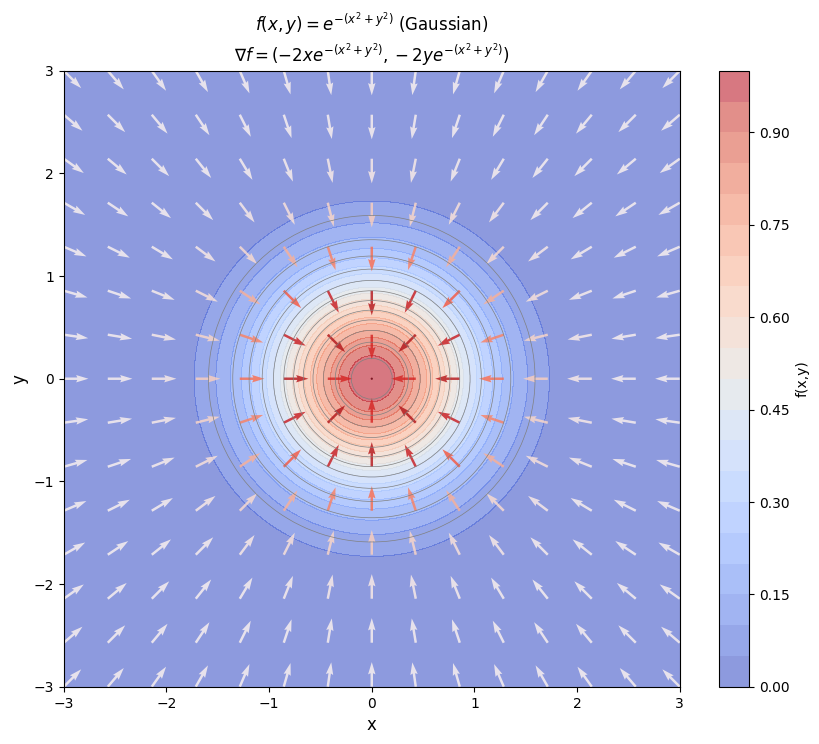

In [7]:
# Example 3: Gaussian (bell curve)
f3 = lambda X, Y: np.exp(-(X**2 + Y**2))
grad3 = lambda X, Y: (-2*X*np.exp(-(X**2 + Y**2)), -2*Y*np.exp(-(X**2 + Y**2)))
plot_gradient_field(f3, grad3,
    '$f(x,y) = e^{-(x^2+y^2)}$ (Gaussian)\n$\\nabla f = (-2xe^{-(x^2+y^2)}, -2ye^{-(x^2+y^2)})$')
plt.show()

## 5. Properties of Gradient Fields

Gradient fields have special properties that distinguish them from arbitrary vector fields.

### Property 1: Conservative (Path Independence)

The line integral of a gradient field depends only on the endpoints, not the path:

$$\int_C \nabla f \cdot d\mathbf{r} = f(\mathbf{b}) - f(\mathbf{a})$$

This is the **Fundamental Theorem of Line Integrals**.

### Property 2: Curl is Zero

For any smooth scalar field $f$:

$$\nabla \times (\nabla f) = \mathbf{0}$$

In 2D, this means: $\frac{\partial}{\partial x}\left(\frac{\partial f}{\partial y}\right) = \frac{\partial}{\partial y}\left(\frac{\partial f}{\partial x}\right)$

This is why gradient fields have no "rotation" or "circulation".

### Property 3: Closed Loop Integral is Zero

$$\oint_C \nabla f \cdot d\mathbf{r} = 0$$

For any closed curve $C$.

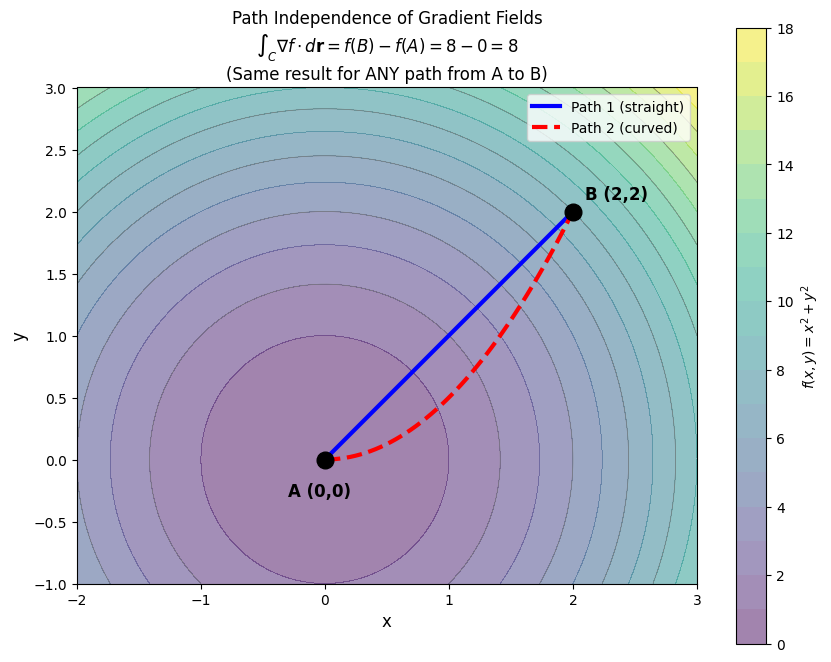

In [8]:
# Demonstrate path independence
fig, ax = plt.subplots(figsize=(10, 8))

# Scalar field: f(x,y) = x^2 + y^2
x = np.linspace(-2, 3, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

contour = ax.contourf(X, Y, Z, levels=20, cmap=cm.viridis, alpha=0.5)
ax.contour(X, Y, Z, levels=10, colors='gray', linewidths=0.5)
plt.colorbar(contour, ax=ax, label='$f(x,y) = x^2 + y^2$')

# Define two different paths from A to B
A = np.array([0, 0])
B = np.array([2, 2])

# Path 1: Straight line
t1 = np.linspace(0, 1, 50)
path1_x = A[0] + t1 * (B[0] - A[0])
path1_y = A[1] + t1 * (B[1] - A[1])
ax.plot(path1_x, path1_y, 'b-', linewidth=3, label='Path 1 (straight)')

# Path 2: Curved path (parabolic)
path2_x = t1 * 2
path2_y = (t1 * 2)**2 / 2  # Goes through (0,0) and curves to (2,2)
ax.plot(path2_x, path2_y, 'r--', linewidth=3, label='Path 2 (curved)')

# Mark endpoints
ax.plot(*A, 'ko', markersize=12)
ax.plot(*B, 'ko', markersize=12)
ax.text(A[0]-0.3, A[1]-0.3, 'A (0,0)', fontsize=12, fontweight='bold')
ax.text(B[0]+0.1, B[1]+0.1, 'B (2,2)', fontsize=12, fontweight='bold')

# Compute integral (just the endpoint difference for gradient fields)
f_A = A[0]**2 + A[1]**2
f_B = B[0]**2 + B[1]**2

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Path Independence of Gradient Fields\n'
             f'$\\int_C \\nabla f \\cdot d\\mathbf{{r}} = f(B) - f(A) = {f_B} - {f_A} = {f_B - f_A}$\n'
             '(Same result for ANY path from A to B)', fontsize=12)
ax.legend()
ax.set_aspect('equal')
plt.show()

## 6. Not All Vector Fields Are Gradient Fields

An important distinction: not every vector field is a gradient of some scalar function.

**Test**: A vector field $\mathbf{F} = (P, Q)$ is a gradient field if and only if:
$$\frac{\partial P}{\partial y} = \frac{\partial Q}{\partial x}$$

Let's compare a gradient field with a non-gradient (rotational) field:

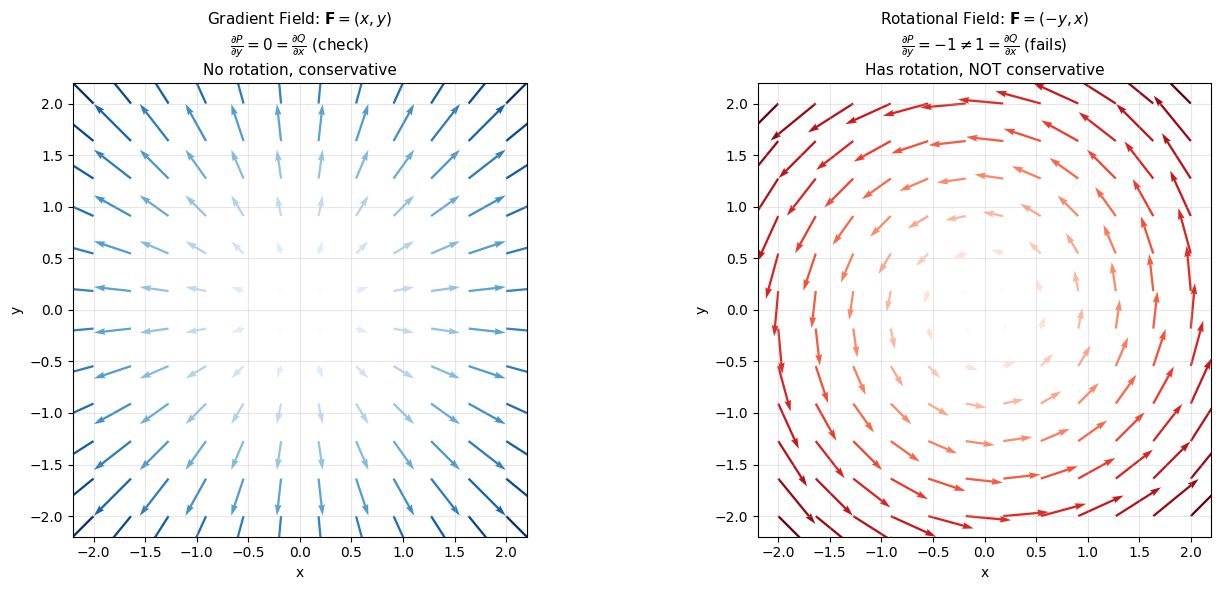

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Grid
x = np.linspace(-2, 2, 12)
y = np.linspace(-2, 2, 12)
X, Y = np.meshgrid(x, y)

# Left: Gradient field F = (x, y) = grad(0.5*(x^2 + y^2))
U1, V1 = X, Y
axes[0].quiver(X, Y, U1, V1, np.sqrt(U1**2 + V1**2), cmap='Blues', scale=20)
axes[0].set_title('Gradient Field: $\\mathbf{F} = (x, y)$\n'
                  '$\\frac{\\partial P}{\\partial y} = 0 = \\frac{\\partial Q}{\\partial x}$ (check)\n'
                  'No rotation, conservative', fontsize=11)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.3)

# Right: Rotational field F = (-y, x) - NOT a gradient
U2, V2 = -Y, X
axes[1].quiver(X, Y, U2, V2, np.sqrt(U2**2 + V2**2), cmap='Reds', scale=20)
axes[1].set_title('Rotational Field: $\\mathbf{F} = (-y, x)$\n'
                  '$\\frac{\\partial P}{\\partial y} = -1 \\neq 1 = \\frac{\\partial Q}{\\partial x}$ (fails)\n'
                  'Has rotation, NOT conservative', fontsize=11)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_aspect('equal')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Physical Applications

Gradient fields appear throughout physics:

### Heat Flow
Heat flows from hot to cold, in the direction of **negative gradient** of temperature:
$$\mathbf{q} = -k \nabla T$$

### Gravity
Gravitational force is the negative gradient of gravitational potential:
$$\mathbf{F} = -\nabla \Phi$$

### Electric Field
Electric field is the negative gradient of electric potential:
$$\mathbf{E} = -\nabla V$$

Let's simulate heat diffusion from a point source:

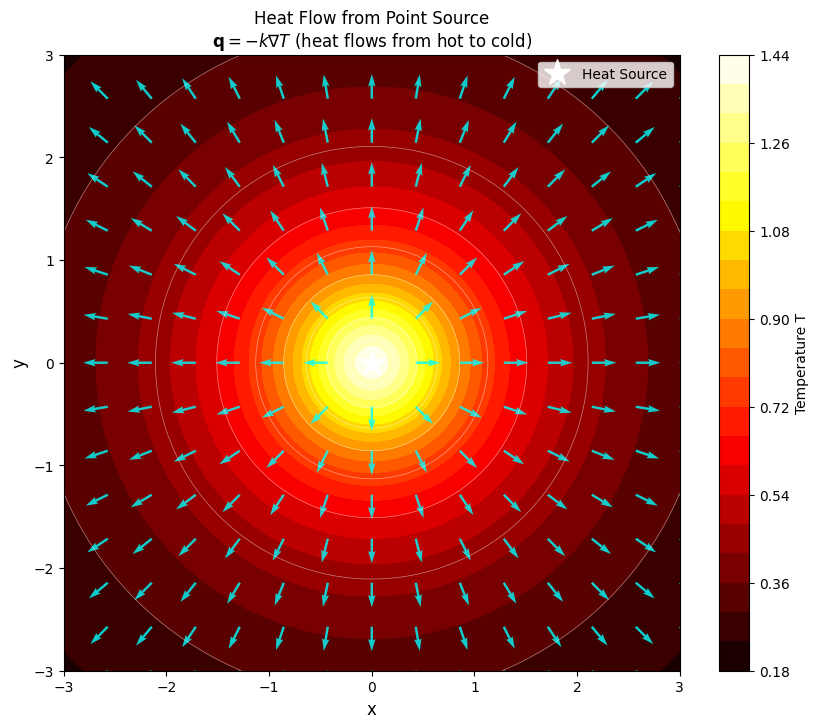

In [10]:
# Simulate temperature field with a heat source at origin
# T(x,y) = T0 / sqrt(x^2 + y^2 + epsilon) (approximation)

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

eps = 0.5  # Regularization to avoid singularity at origin
r = np.sqrt(X**2 + Y**2 + eps)
T = 1 / r  # Temperature (higher near source)

# Heat flow is negative gradient of T
# For T = 1/r, gradient points toward origin, so heat flows outward
x_v = np.linspace(-3, 3, 15)
y_v = np.linspace(-3, 3, 15)
Xv, Yv = np.meshgrid(x_v, y_v)
rv = np.sqrt(Xv**2 + Yv**2 + eps)

# grad(1/r) = -r_hat / r^2, so -grad(1/r) points outward
# Heat flow q = -k*grad(T) points outward (away from hot source)
dTdx = -Xv / (rv**3)
dTdy = -Yv / (rv**3)
# Negative gradient (heat flow direction)
qx = -dTdx
qy = -dTdy

fig, ax = plt.subplots(figsize=(10, 8))

# Temperature field
contour = ax.contourf(X, Y, T, levels=20, cmap='hot')
ax.contour(X, Y, T, levels=10, colors='white', linewidths=0.5, alpha=0.5)
plt.colorbar(contour, ax=ax, label='Temperature T')

# Heat flow vectors (normalized for visualization)
mag = np.sqrt(qx**2 + qy**2)
mag[mag == 0] = 1
ax.quiver(Xv, Yv, qx/mag, qy/mag, color='cyan', alpha=0.8, scale=25)

ax.plot(0, 0, 'w*', markersize=20, label='Heat Source')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Heat Flow from Point Source\n'
             '$\\mathbf{q} = -k\\nabla T$ (heat flows from hot to cold)', fontsize=12)
ax.legend()
ax.set_aspect('equal')
plt.show()

## 8. Computing Gradients Numerically

When we don't have an analytical formula, we can approximate the gradient using finite differences:

$$\frac{\partial f}{\partial x} \approx \frac{f(x+h, y) - f(x-h, y)}{2h}$$

NumPy's `np.gradient` function does this automatically:

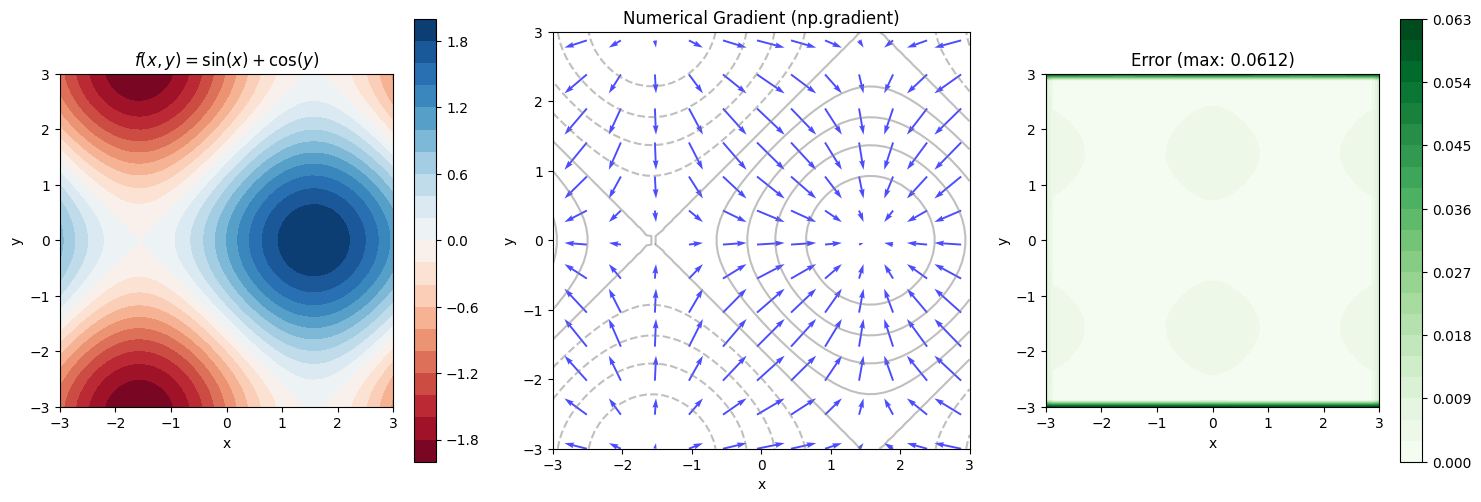

In [11]:
def numerical_gradient_demo():
    """Compare analytical and numerical gradients."""
    # Define a complex function
    x = np.linspace(-3, 3, 50)
    y = np.linspace(-3, 3, 50)
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    X, Y = np.meshgrid(x, y)
    
    # f(x,y) = sin(x) + cos(y)
    Z = np.sin(X) + np.cos(Y)
    
    # Numerical gradient using np.gradient
    # Note: np.gradient returns (dZ/dy, dZ/dx) for a 2D array
    dZdy_num, dZdx_num = np.gradient(Z, dy, dx)
    
    # Analytical gradient
    dZdx_exact = np.cos(X)
    dZdy_exact = -np.sin(Y)
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original function
    c1 = axes[0].contourf(X, Y, Z, levels=20, cmap='RdBu')
    plt.colorbar(c1, ax=axes[0])
    axes[0].set_title('$f(x,y) = \\sin(x) + \\cos(y)$')
    axes[0].set_aspect('equal')
    
    # Numerical gradient field
    step = 4  # Subsample for clarity
    axes[1].quiver(X[::step, ::step], Y[::step, ::step], 
                   dZdx_num[::step, ::step], dZdy_num[::step, ::step],
                   color='blue', alpha=0.7, scale=15)
    axes[1].contour(X, Y, Z, levels=10, colors='gray', alpha=0.5)
    axes[1].set_title('Numerical Gradient (np.gradient)')
    axes[1].set_aspect('equal')
    
    # Error (should be very small)
    error = np.sqrt((dZdx_num - dZdx_exact)**2 + (dZdy_num - dZdy_exact)**2)
    c3 = axes[2].contourf(X, Y, error, levels=20, cmap='Greens')
    plt.colorbar(c3, ax=axes[2])
    axes[2].set_title(f'Error (max: {error.max():.4f})')
    axes[2].set_aspect('equal')
    
    for ax in axes:
        ax.set_xlabel('x')
        ax.set_ylabel('y')
    
    plt.tight_layout()
    plt.show()

numerical_gradient_demo()

## Summary

| Concept | Description |
|---------|-------------|
| **Scalar Field** | Function $f(x,y)$ assigning a number to each point |
| **Gradient** | $\nabla f = (\partial f/\partial x, \partial f/\partial y)$ |
| **Direction** | Points toward steepest ascent |
| **Magnitude** | Measures the rate of steepest ascent |
| **Perpendicular** | Gradient is perpendicular to level curves |
| **Conservative** | Line integrals are path-independent |
| **Curl-free** | $\nabla \times (\nabla f) = 0$ |

### Key Takeaways

1. Every scalar field generates a gradient field
2. Not every vector field is a gradient field
3. Gradient fields are conservative (path-independent integrals)
4. Physical forces like gravity and electric fields are gradients of potentials
5. The gradient points perpendicular to contour lines